## Loss function
모델의 예측값을  $\hat{y}$로 표기한다.   
model을 학습시킬 때, dataset에 정답 y가 포함되어 있으면, Supervised Learning 이라고 하며, model의 예측값(prediction) $\hat{y}$ 와 정답 y 간의 오차를 계산한다.  

- $\hat{y}$가 실수 값인 경우 Regression.
- Regression의 값은 연속적(continue)이며, 대소관계가 존재한다.
- $\hat{y}$가 정수 값인 경우 Classification.
- classification은 값이 비연속적(discrete)이며, 단순히 class에 index를 부여한 것이다.

<img src="https://drive.google.com/uc?export=download&id=1xsTdrPOYao0QWyE28KaI9PZe578ADbK6">

### One-hot encoding
class를 0, 1, 2 ... 등의 정수형태로 표기할 수 있으나, one-hot encoding을 통해 다르게 나타낼 수 있다. 자신에 해당하는 index의 값만 1이고, 그렇지 않은 index는 0이다.

[강아지, 고양이, 사람]
- 강아지 : (0, 0, 1)
- 고양이 : (0, 1, 0)
- 사람 : (1, 0, 0)

# Regression
학생들의 성적을 예측한다거나, 암이 발생할 확률을 예측한다 등을 regression problem이라 한다.
<img src="https://drive.google.com/uc?export=download&id=1fQwh89Y9DIX0MJQv1EgpfZzuiL1Vyv3N">
- dataset을 구성하는 row는 각각의 data sample을 말함.(예를 들어 학생1, 학생2, 학생3, ... 학생N)
- column은 data의 attribute(feature)로 공부시간, 등하교 소요시간, 다니는 학원의 수, 수면 시간 등.
- Y 벡터는 각각 학생들의 성적. 정답에 해당하며 model의 prediction과 비교한다.

### 1개의 데이터를 입력할 때.
<img src="https://drive.google.com/uc?export=download&id=1k9R20EQsQbd0LrhTyp33L--ypIE-aGQh">

- 학생 1에 대한 데이터들을 입력.(X와 Y로 구성)
- 구성한 Layer들을 거치게 되는데, 마지막 layer에서는 Activation function을 사용하지 않으며 1개의 뉴런으로 구성.(예측값 1개를 출력해야 하니까).
- 출력한 값이 $\hat{y}$. y-prediction이되어, 정답값 y와의 오차를 계산한다.
- Sqared Error : $ J = (y-\hat{y})^2$ 를 계산하며, 두 값의 차이가 작을수록 loss 값이 작다.

## mini batch 단위로 입력할 때.

<img src="https://drive.google.com/uc?export=download&id=1YHlQlRMG3g3vHQgkKmq_PAxCBm4g6nSI">

- 입력 데이터 X는 l<sub>i</sub> 개의 feature를 가진 row vector가 N개 쌓여있는 Matrix.
- 학생1, 학생2, ... 들의 데이터가 batch size N만큼 존재.
- 데이터 row 각각에 대한 prediction value를 구하고, column vector $\hat{Y}$로 나타낸다.
- 정답값 y들이 vector로 묶인 column vector Y와 비교를 진행한다.
- batch-size N개에 대한 비교이므로 이에 대한 평균을 구함. Mean Squared Error.
- 평균을 구하는 이유는 N개의 y와 y-prediction 간의 차이를 평균 낸 것이 바로 loss 값.

In [ ]:
## Regression dataset 만들기

import tensorflow as tf

N, n_feature = 8, 5
X = tf.random.normal(mean=0, stddev=1, shape=(N, n_feature)) ## 8 by 5 matrix
target_weights = tf.constant([1, 2, 3, 4, 5], dtype=tf.float32) ## 5 by 1 column
target_bias = tf.constant([10], dtype=tf.float32) ## 1 bias

print(X.shape, target_weights.shape, target_bias.shape)

Y = tf.reduce_sum(X * target_weights, axis=1) + target_bias
print(f"X : {X.shape} \n {X}")
print(f"Y : {Y.shape} \n {Y}")

(8, 5) (5,) (1,)
X : (8, 5) 
 [[-1.4930753   1.3345237  -0.91198444 -0.50894606 -0.6075962 ]
 [ 1.3073512  -1.7033762  -0.72343546  1.8242912   1.7353021 ]
 [ 0.361023    0.8645596  -0.19657306 -2.360987    0.40157598]
 [ 3.1990354   1.7235271   0.8566709  -0.70381325  0.1907561 ]
 [-0.12984852 -0.82439935 -0.46054646  2.1541405   1.5393333 ]
 [-0.4477212  -1.7297351   1.2450572   0.9209218  -0.280761  ]
 [-0.23906367 -0.4622468   0.8814835  -1.2936985  -2.3412263 ]
 [ 0.19042341  0.33515307  1.7220889  -2.3718932   0.4755156 ]]
Y : (8,) 
 [ 3.3662534 21.703968   4.064355  17.35463   23.152943  12.107862
 -5.400033   8.917002 ]


In [ ]:
## Mean Squared Error

loss_object = tf.keras.losses.MeanSquaredError()

batch_size = 32
predictions = tf.random.normal(shape=(batch_size, 1))
labels = tf.random.normal(shape=(batch_size, 1))

mse = loss_object(labels, predictions)
mse_man = tf.reduce_mean(tf.math.pow(labels - predictions, 2))
print(f"MSE tensorflow : {mse}")
print(f"MSE manual : {mse_man}")

MSE tensorflow : 2.59311580657959
MSE manual : 2.59311580657959


In [ ]:
## Mean Squared Error with model

batch_size = 32
N, n_features = 100, 5
X = tf.random.normal(shape=(N, n_feature))
Y = tf.random.normal(shape=(N, 1))

dataset = tf.data.Dataset.from_tensor_slices((X, Y))
dataset = dataset.batch(batch_size)

dense = tf.keras.layers.Dense(units=1, activation="linear")
loss_object = tf.keras.losses.MeanSquaredError()

for x, y in dataset:
    predictions = dense(x)
    loss = loss_object(y, predictions)
    print(loss.numpy())

2.1307113
4.365202
2.8709025
2.9927843


## Binary Classification
Regression이 시험 점수를 예측하는 것이라면, Binary classification은 시험에 합격하거나 불합격하는 것을 분류한다. 따라서 y값이 0 또는 1로 구성되어 있다.

<img src="https://drive.google.com/uc?export=download&id=1EHrRo6N85cXcgb4Loz4U3dijtbXUW5Sx">



## Binary Cross Entropy
<img src="https://drive.google.com/uc?export=download&id=1evwtFpgWjbgF6EDdolxsf6nyTj5dkQ6H">

- y = 1 인 경우, $(1-y)log(1-\hat{y}) = 0$이 된다.
- 따라서 $-log(\hat{y})$ 항만 남게 된다.
- -log 함수는 입력이 1에 가까워질수록 출력이 0에 수렴하고, 입력이 0에 가까워질수록 출력이 무한히 발산한다.

<img src="https://drive.google.com/uc?export=download&id=1KSTtR1PKAnQ1ZGlaxxe_18tCLtJT3zNJ">

- y = 0 인경우, $ylog(\hat{y})$ 항이 0이 된다.  
- 따라서 $-log(1-\hat{y})$ 항만 남게 된다.
- $-log(1-\hat{y})$ 함수는 입력값이 1에 가까워질수록 함수값은 무한히 발산. 입력값이 0에 가까워질수록 함수값은 0에 수렴한다.

<img src="https://drive.google.com/uc?export=download&id=11Tqme2ytnSfX3I_aArHoYUJQt3MzltOy">

<img src="https://drive.google.com/uc?export=download&id=1rohBqwsj2ujkCIYlCSoJMgRjQ2-d85Ye">
<img src="https://drive.google.com/uc?export=download&id=1UElDXIkw1Y3HTgrariXNBheUCqvuV2A8">

- 마지막 layer의 출력값 형태가 벡터가 아닌 하나의 값이므로 1개 뉴런으로 구성되어야 함.
- Binary Cross Entropy는 결국 $\hat{y}$의 값이 0 ~ 1 범위에서 어떤 값인지가 중요하므로, 마지막 layer를 통해 얻은 logit이 probability가 되어야 함.
- 따라서 마지막 layer의 activation function은 sigmoid가 된다.

In [ ]:
## Binary Classification
import tensorflow as tf

N, n_feature = 8, 5
target_weights = tf.constant([1, 2, 3, 4, 5], dtype=tf.float32)
target_bias = tf.constant([10], dtype=tf.float32)

X = tf.random.normal(mean=0, stddev=1, shape=(N, n_feature))
print(f"X : {X.shape} \n {X}")
print(X.shape, target_weights.shape, target_bias.shape)

Y = tf.reduce_sum(X * target_weights, axis=1) + target_bias
print(f"reduce sum : {Y.shape} \n {Y.numpy()}")

Y = tf.cast(Y > 5, tf.int32)
print(f"Y : {Y.shape} \n {Y}")

X : (8, 5) 
 [[ 0.8971406   0.7637453  -0.40252882 -0.01442187  0.7320041 ]
 [ 0.7712169  -0.4104496  -0.3545627  -1.4140564   0.85937285]
 [ 0.64813685 -0.5272903  -0.1369112  -0.33742204 -0.72552776]
 [ 1.6623427  -0.6150131   0.68115395 -0.84319794  0.70150703]
 [ 3.0791583  -0.0348709  -0.7581134   0.4046151   1.7619365 ]
 [-0.65070665  1.5007422  -0.77921444  0.72349554 -1.4902612 ]
 [ 2.1759677   1.4378273  -0.8732416  -0.6168947  -0.7616505 ]
 [ 0.73975    -0.5597336  -0.9970531   0.24529079  0.38122442]]
(8, 5) (5,) (1,)
reduce sum : (8,) 
 [14.819378   7.5272684  4.205496  12.610521  21.16322    5.4558105
  6.156066   9.516409 ]
Y : (8,) 
 [1 1 0 1 1 1 1 1]


In [ ]:
## Binary Cross Entropy
batch_size = 10
n_class = 2

predictions = tf.random.uniform(shape=(batch_size, 1), minval=0, maxval=1, dtype=tf.float32)
labels = tf.random.uniform(shape=(batch_size, 1), minval=0, maxval=n_class, dtype=tf.int32)

print(predictions) ## 10 by 1
print(labels) ## 10 by 1

loss_object = tf.keras.losses.BinaryCrossentropy()
loss = loss_object(labels, predictions)

labels = tf.cast(labels, tf.float32)
bce_man = -(labels*tf.math.log(predictions) + (1 - labels) * tf.math.log(1 - predictions))
bce_man = tf.reduce_mean(bce_man)

print(f"BCE : {loss}")
print(f"BCE man : {bce_man}")

tf.Tensor(
[[0.6767442 ]
 [0.7782978 ]
 [0.9923327 ]
 [0.30122685]
 [0.04045272]
 [0.2641797 ]
 [0.6056509 ]
 [0.35480618]
 [0.00303745]
 [0.9727193 ]], shape=(10, 1), dtype=float32)
tf.Tensor(
[[0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]], shape=(10, 1), dtype=int32)
BCE : 0.9793401956558228
BCE man : 0.9793416857719421


In [ ]:
## Binary Cross Entropy with model

N, n_feature = 8, 5
target_weights = tf.constant([1, 2, 3, 4, 5], dtype=tf.float32) ## 
target_bias = tf.constant([0], dtype=tf.float32)

X = tf.random.normal(mean=0, stddev=1, shape=(N, n_feature)) ## 8 by 5 matrix
Y = tf.reduce_sum(target_weights * X, axis=1) + target_bias ## affine transform 8 by 1
Y = tf.cast(Y > 5, tf.int32) ## 8 by 1

print(f"X : {X.shape} \n {X}")
print(f"Y : {Y.shape} \n {Y}")

dataset = tf.data.Dataset.from_tensor_slices((X, Y))
dataset = dataset.batch(batch_size)

dense = tf.keras.layers.Dense(units=1, activation="sigmoid")
loss_object = tf.keras.losses.BinaryCrossentropy()

for x, y in dataset:
    predictions = dense(x)
    print(f"predictions : {predictions.shape} \n {predictions}")
    loss = loss_object(y, predictions)
    print(loss.numpy())

X : (8, 5) 
 [[-0.6010925  -0.5660992  -0.386588   -0.6002969  -1.0383561 ]
 [-0.0137465   0.77732587 -0.41400546 -1.9393202  -0.27516377]
 [ 0.13965504  1.7425207   0.30244008  0.38045844 -0.06429812]
 [-1.8608521   0.42624462  0.20577724 -0.45701393 -0.6324689 ]
 [-1.7730737  -0.13730684  1.6123035   0.37824613  0.39735457]
 [-0.8173574  -0.210524    0.9694306  -0.35207486 -0.5038772 ]
 [ 0.7539557   0.00812332  1.2958614   0.89508927 -0.08692147]
 [ 1.0397815   0.4703509  -0.85144025 -0.37842005  1.1476145 ]]
Y : (8,) 
 [0 0 1 0 1 0 1 0]
predictions : (8, 1) 
 [[0.6374223 ]
 [0.11336823]
 [0.4709648 ]
 [0.62399036]
 [0.7412806 ]
 [0.67201483]
 [0.7688769 ]
 [0.10764408]]
0.5821038


## Multi-class Classification
<img src="https://drive.google.com/uc?export=download&id=1lr--YUxgthwVJesJGVUClFvOH3db265I">
<img src="https://drive.google.com/uc?export=download&id=1_cgNx8FUJ2EkJtbVj2APg8pSf9I1LG2X">

multi-class classification은 K개의 class에 대한 분류를 진행한다.  
class 값을 단순히 정수의 형태로 y로 사용할 수 있지만, 보통은 One-hot encoding을 적용하여 사용한다.

one-hot encoding을 적용하면 정수값 y가 class index에 해당하는 값만 1이고 나머지는 0인 row vector로 변환된다.  
따라서, minibatch 형태로 입력이 진행되면 N개의 K차원의 row vector로 구성된 matrix가 입력된다.

## Categorical Cross Entropy
<img src="https://drive.google.com/uc?export=download&id=1s2i-DLyj7hyAJIYFXVQtKnqR18bVqQ4_">
<img src="https://drive.google.com/uc?export=download&id=1RAKAG5SNIqS7REHgqW3XhgNhtulubyBJ">

- 입력 y의 형태가 one-hot encoding을 통해 row vector 형태임.
- 마지막 layer는 activation function이 없으며, K차원의 row logit vector를 출력한다.
- 이를 softmax 함수를 통해 K차원의 row probability vector를 구할 수 있다.
- 따라서 y row vector와 y-pred row vector를 입력으로 받는다.

<img src="https://drive.google.com/uc?export=download&id=1ptmcJ3nG5Hizy_CSS0eXi41f71fExjiH">
<img src="https://drive.google.com/uc?export=download&id=1OWpDF4PlSOnyGfLBQYI3V8RB8FW9okp2">

- 마찬가지로 minibatch로 입력이 되면, batch size로 나눗셈을 해서 평균을 구함.
- 평균을 구하는 이유는 N개의 y와 y-prediction 간의 차이를 평균 낸 것이 바로 loss 값.

X : (25, 2)
Y : (25, 1)


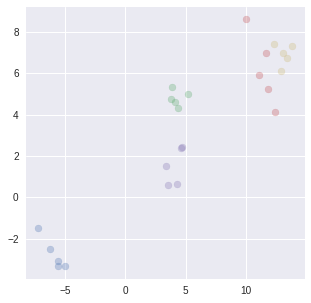

In [ ]:
## Multi-class classification
import matplotlib.pyplot as plt
plt.style.use("seaborn")

N, n_features = 5, 2
n_class = 5

X = tf.zeros(shape=(0, n_features))
Y = tf.zeros(shape=(0, 1), dtype=tf.int32)

fig, ax = plt.subplots(figsize=(5, 5))
for class_idx in range(n_class):
    center = tf.random.uniform(minval=-15, maxval=15, shape=(2, ))
    # ax.scatter(center[0], center[1])

    x1 = center[0] + tf.random.normal(shape=(N, 1))
    x2 = center[1] + tf.random.normal(shape=(N, 1))

    x = tf.concat((x1, x2), axis=1) ## row vector
    y = class_idx * tf.ones(shape=(N, 1), dtype=tf.int32) ## y label
    
    ax.scatter(x[:, 0].numpy(), x[:, 1].numpy(), alpha=0.3)

    X = tf.concat((X, x), axis=0)
    Y = tf.concat((Y, y), axis=0)

print(f"X : {X.shape}")
print(f"Y : {Y.shape}")

(0, 2) (0,)
X : (25, 2) 
 [[ -0.05988193  -2.9711075 ]
 [ -2.878868    -2.7270973 ]
 [ -2.2376947   -2.3564384 ]
 [ -0.6761137   -4.064433  ]
 [ -2.0821295   -1.65471   ]
 [  3.5832343    6.8667564 ]
 [  2.7934155    5.5425296 ]
 [  3.0078645    5.430078  ]
 [  3.780807     6.1911836 ]
 [  5.444022     5.6988983 ]
 [  0.5050835   -1.5070549 ]
 [  3.303052    -1.890443  ]
 [  1.5058894   -4.6927137 ]
 [  2.5735385   -3.5459008 ]
 [  0.5045102   -2.4640896 ]
 [-10.211936     9.6783695 ]
 [-10.437976    10.406769  ]
 [-10.8360615    8.640528  ]
 [-10.453811    10.233645  ]
 [-10.959584     9.777502  ]
 [ 11.079583     5.4994206 ]
 [  7.8786907    4.553482  ]
 [ 12.7092285    7.489186  ]
 [ 11.352158     4.471371  ]
 [ 10.325008     6.755242  ]]
Y : (25, 5) 
 [[1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]


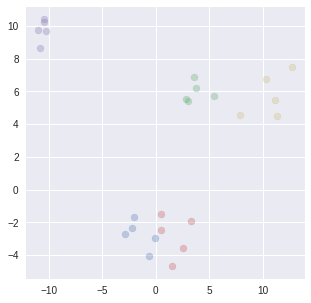

In [ ]:
## Multi-class classification + one-hot encoding
import matplotlib.pyplot as plt
plt.style.use("seaborn")

N, n_features = 5, 2
n_class = 5

X = tf.zeros(shape=(0, n_features)) ## (2, )
Y = tf.zeros(shape=(0, ), dtype=tf.int32) ## (0, )
print(X.shape, Y.shape)

fig, ax = plt.subplots(figsize=(5, 5))
for class_idx in range(n_class):
    center = tf.random.uniform(minval=-15, maxval=15, shape=(2, ))
    # ax.scatter(center[0], center[1])

    x1 = center[0] + tf.random.normal(shape=(N, 1))
    x2 = center[1] + tf.random.normal(shape=(N, 1))

    x = tf.concat((x1, x2), axis=1)
    y = class_idx * tf.ones(shape=(N, ), dtype=tf.int32)
    
    ax.scatter(x[:, 0].numpy(), x[:, 1].numpy(), alpha=0.3)

    X = tf.concat((X, x), axis=0)
    Y = tf.concat((Y, y), axis=0)

Y = tf.one_hot(Y, depth=n_class, dtype=tf.int32)
print(f"X : {X.shape} \n {X}")
print(f"Y : {Y.shape} \n {Y}")

In [ ]:
## Sparse Categorical Cross Entropy

batch_size, n_class = 16, 5

predictions = tf.random.uniform(shape=(batch_size, n_class),
                                minval=0, maxval=1, 
                                dtype=tf.float32)

pred_sum = tf.reshape(tf.reduce_sum(predictions, axis=1), (-1, 1)) ## 각각의 row vector 총합
predictions = predictions / pred_sum ## 이 과정을 통해 prediction row의 합은 1이된다.

labels = tf.random.uniform(shape=(batch_size, ),
                           minval=0, maxval=n_class,
                           dtype=tf.int32)

loss_object = tf.keras.losses.SparseCategoricalCrossentropy()
loss = loss_object(labels, predictions)

ce = 0
for label, prediction in zip(labels, predictions):
    ce += -tf.math.log(prediction[label])

ce /= batch_size
print(ce.numpy())

1.9584482


In [ ]:
## Sparse Categorical Cross Entropy with Model
N, n_features = 100, 2
n_class = 5

X = tf.zeros(shape=(0, n_features))
Y = tf.zeros(shape=(0, 1), dtype=tf.int32)

for class_idx in range(n_class):
    center = tf.random.uniform(minval=-15, maxval=15, shape=(2, ))

    x1 = center[0] + tf.random.normal(shape=(N, 1))
    x2 = center[1] + tf.random.normal(shape=(N, 1))

    x = tf.concat((x1, x2), axis=1)
    y = class_idx * tf.ones(shape=(N, 1), dtype=tf.int32)
    
    X = tf.concat((X, x), axis=0)
    Y = tf.concat((Y, y), axis=0)

dataset = tf.data.Dataset.from_tensor_slices((X, Y))
dataset = dataset.batch(batch_size)

dense = tf.keras.layers.Dense(units=n_class, activation="softmax")
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()

for x, y in dataset:
    predictions = dense(x)
    loss = loss_object(y, predictions)
    print(loss.numpy())

5.592183
5.588833
5.625864
5.6471267
5.7249603
5.817146
4.8429933
4.6092863
4.79323
4.396792
4.2065177
4.49392
1.982167
0.076511085
0.06899251
0.087938726
0.08928342
0.07531454
0.61767024
2.2443533
1.9303048
2.1251311
1.7862756
2.222279
1.765198
0.01504786
0.010954406
0.011267267
0.012008047
0.021366498
0.0063185967
0.008993806


In [ ]:
## Categorical Cross Entropy

batch_size, n_class = 16, 5

predictions = tf.random.uniform(shape=(batch_size, n_class),
                                minval=0, maxval=1,
                                dtype=tf.float32)

pred_sum = tf.reduce_sum(predictions, axis=1) ## row 단위로 더함. 16
pred_sum = tf.reshape(pred_sum, (-1, 1)) ## 16, 1
predictions = predictions / pred_sum ## row 단위로 합을 나눠주면, row별로 총 합이 1인 prediction으로 만들어짐.

labels = tf.random.uniform(shape=(batch_size, ),
                           minval=0, maxval=n_class,
                           dtype=tf.int32)
labels = tf.one_hot(labels, n_class)

loss_object = tf.keras.losses.CategoricalCrossentropy()
loss = loss_object(labels, predictions)

print("CCE tensorflow : ", loss.numpy())

tmp = tf.reduce_mean(tf.reduce_sum(-labels * tf.math.log(predictions), axis=1))
print("CCE man : ", tmp.numpy())

CCE tensorflow :  2.267531
CCE man :  2.267531


In [ ]:
N, n_feature = 8, 2
n_class = 5

X = tf.zeros(shape=(0, n_feature))
Y = tf.zeros(shape=(0, ), dtype=tf.int32)

for class_idx in range(n_class):
    center = tf.random.uniform(minval=-15, maxval=15, shape=(2, ))
    
    x1 = center[0] + tf.random.normal(shape=(N, 1))
    x2 = center[1] + tf.random.normal(shape=(N, 1))

    x = tf.concat((x1, x2), axis=1)
    y = class_idx * tf.ones(shape=(N, ), dtype=tf.int32)

    X = tf.concat((X, x), axis=0)
    Y = tf.concat((Y, y), axis=0)

Y = tf.one_hot(Y, depth=n_class, dtype=tf.int32)

dataset = tf.data.Dataset.from_tensor_slices((X, Y))
dataset = dataset.batch(batch_size)

model = tf.keras.layers.Dense(units=n_class, activation="softmax")
loss_object = tf.keras.losses.CategoricalCrossentropy()

for x, y in dataset:
    predictions = model(x)
    loss = loss_object(y, predictions)
    print(loss.numpy())

2.3614678
4.386647
5.8316183


In [ ]:
batch_size, n_class =16, 5

predictions = tf.random.uniform(shape=(batch_size, n_class),
                                minval=0, maxval=1,
                                dtype=tf.float32) ## 0 ~ 1 사이 값.
print(predictions[0])

pred_sum = tf.reduce_sum(predictions, axis=1) ## row 단위로 더함. 16
print(pred_sum[0])


pred_sum = tf.reshape(pred_sum, (-1, 1)) ## 16, 1
print(pred_sum[0])


predictions = predictions / pred_sum ## row 단위로 합을 나눠주면, row별로 총 합이 1인 prediction으로 만들어짐.
print(predictions[0])
print(tf.reduce_sum(predictions[0]))

tf.Tensor([0.920025   0.8870747  0.18793738 0.78301775 0.29404616], shape=(5,), dtype=float32)
tf.Tensor(3.0721009, shape=(), dtype=float32)
tf.Tensor([3.0721009], shape=(1,), dtype=float32)
tf.Tensor([0.29947746 0.2887518  0.06117552 0.25488022 0.09571501], shape=(5,), dtype=float32)
tf.Tensor(1.0000001, shape=(), dtype=float32)
